In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score

In [12]:
# Step 1: Load the dataset
df = pd.read_csv("/content/Air_quality_data.csv")

#### Step 2: Explore the dataset

In [13]:
print("Basic Info:")
df.info()

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air_Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [14]:
print("\n First 5 rows:")
df.head()


 First 5 rows:


Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air_Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

In [15]:
print("\n Last 5 rows:")
df.tail()


 Last 5 rows:


Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density Air_Quality  
4995                            2.8                 765   Hazardous  
4996                            5.7                 709    Moderate  
4997                            9.6                 379    Moderate  
4998                           11.6                 241        Good  
4999                            8.3                 461    Moderate

In [16]:
print("\n Summary Statistics:")
df.describe()


 Summary Statistics:


Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%       5.100000     1.030000                       5.400000   
50%       8.000000     1.410000                       7.900000   
75%      13.725000     1.840000                      11.100000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         5000.000000  
mean           497.423800  
std            152.754084  
min            188.000000  
25%            381.000000  
50%            494.000000  
75%            600.000000  
max            957.000000

In [17]:
print("\n Missing Values:")
df.isnull().sum()


 Missing Values:


Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air_Quality                      0
dtype: int64

In [18]:
print("\n Unique Values:")
df.nunique()


 Unique Values:


Temperature                      362
Humidity                         723
PM2.5                            815
PM10                             955
NO2                              445
SO2                              348
CO                               265
Proximity_to_Industrial_Areas    179
Population_Density               683
Air_Quality                        4
dtype: int64

#### Step 3: Visualize the dataset

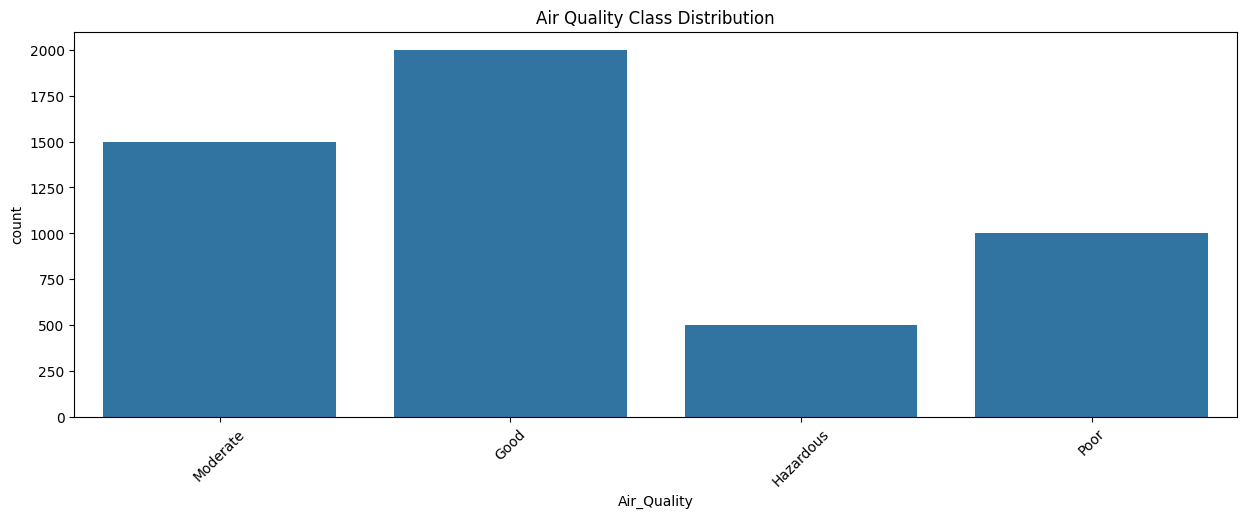

In [19]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="Air_Quality")
plt.title("Air Quality Class Distribution")
plt.xticks(rotation=45)
plt.show()

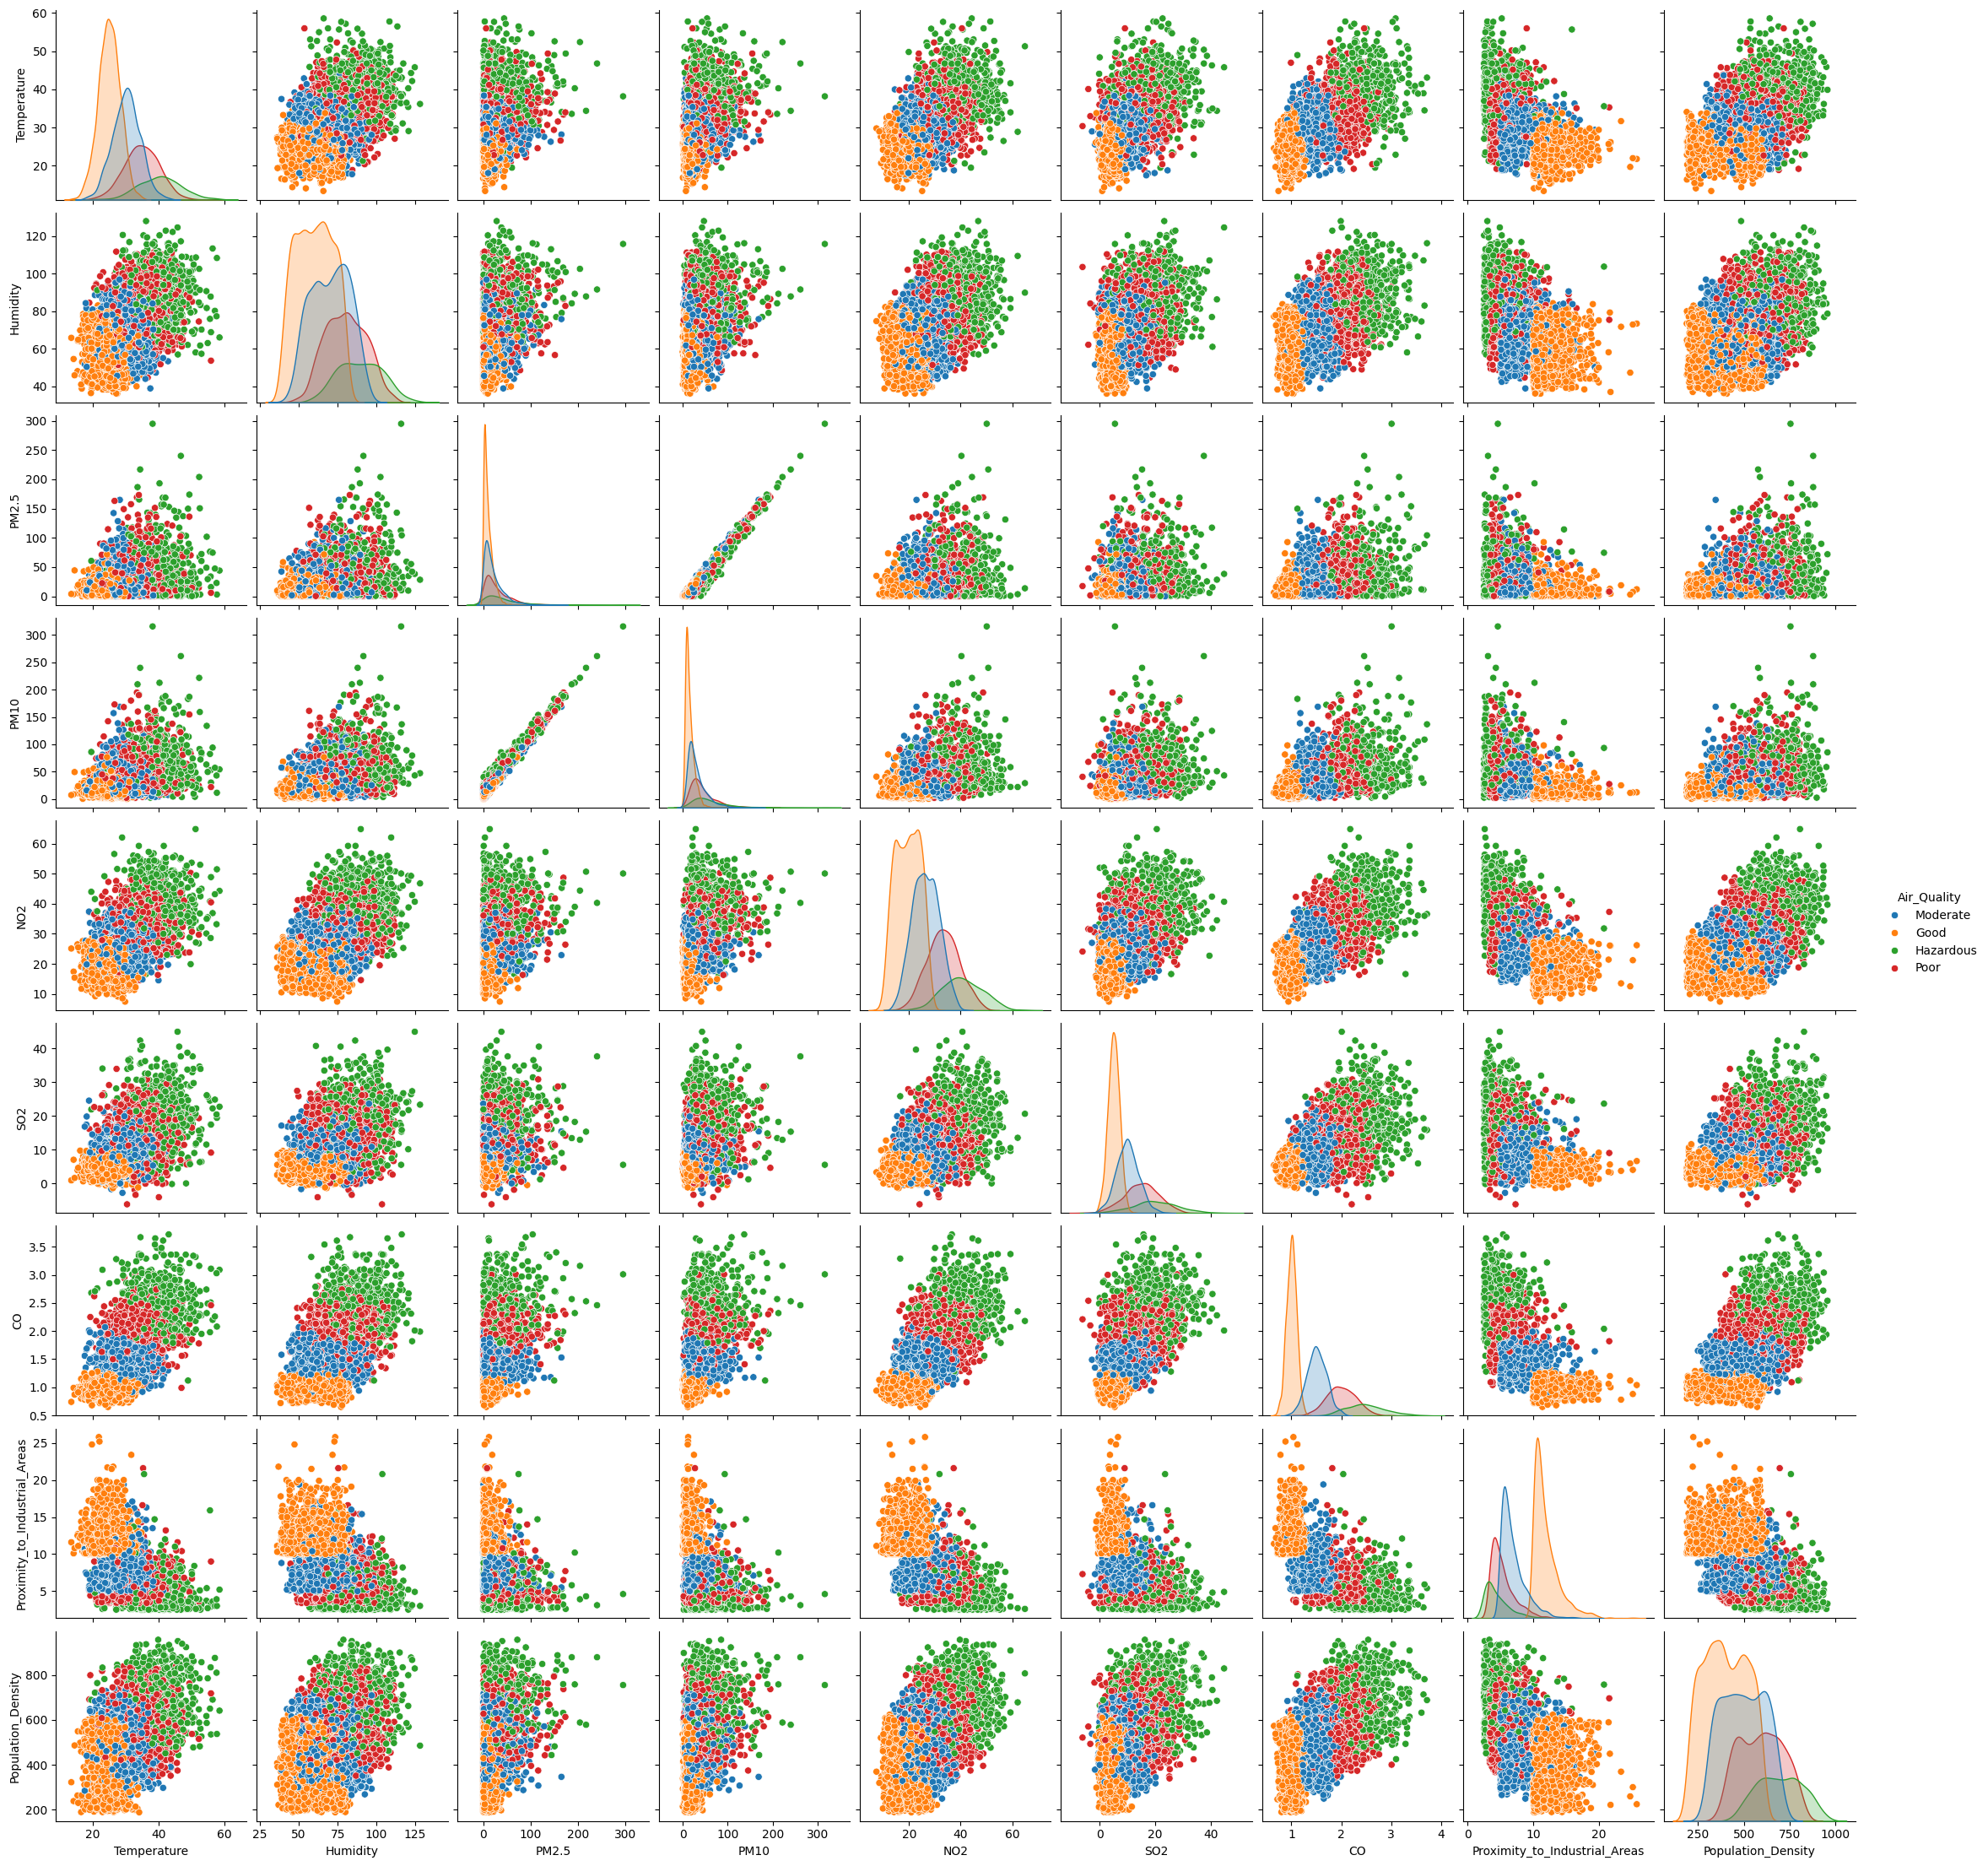

In [20]:
sns.pairplot(df, hue="Air_Quality", diag_kind="kde")
plt.show()

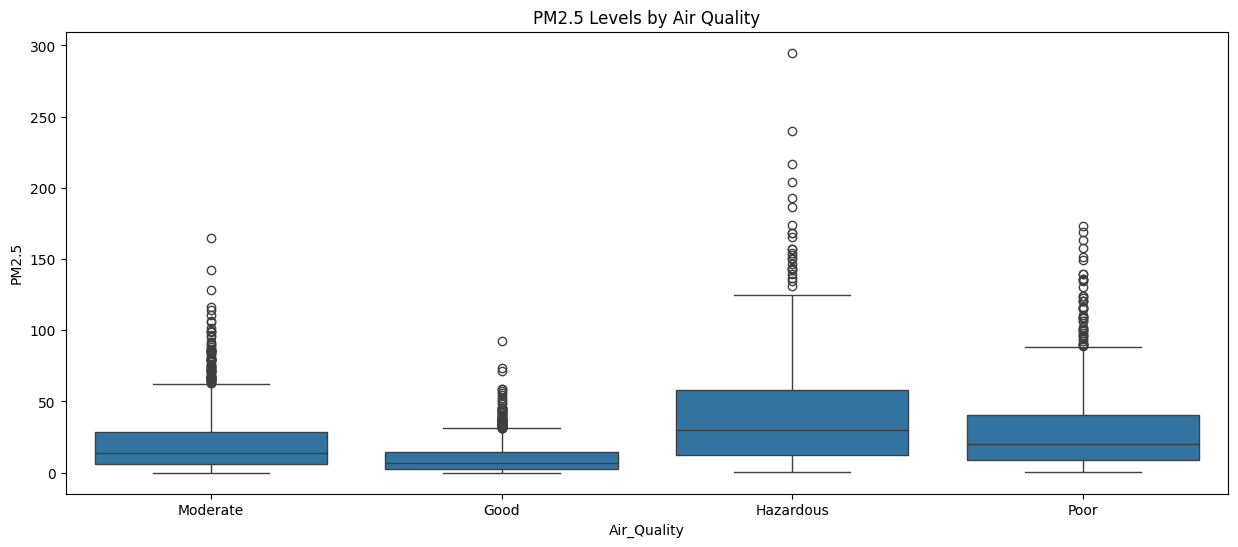

In [21]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="Air_Quality", y="PM2.5")
plt.title("PM2.5 Levels by Air Quality")
plt.show()

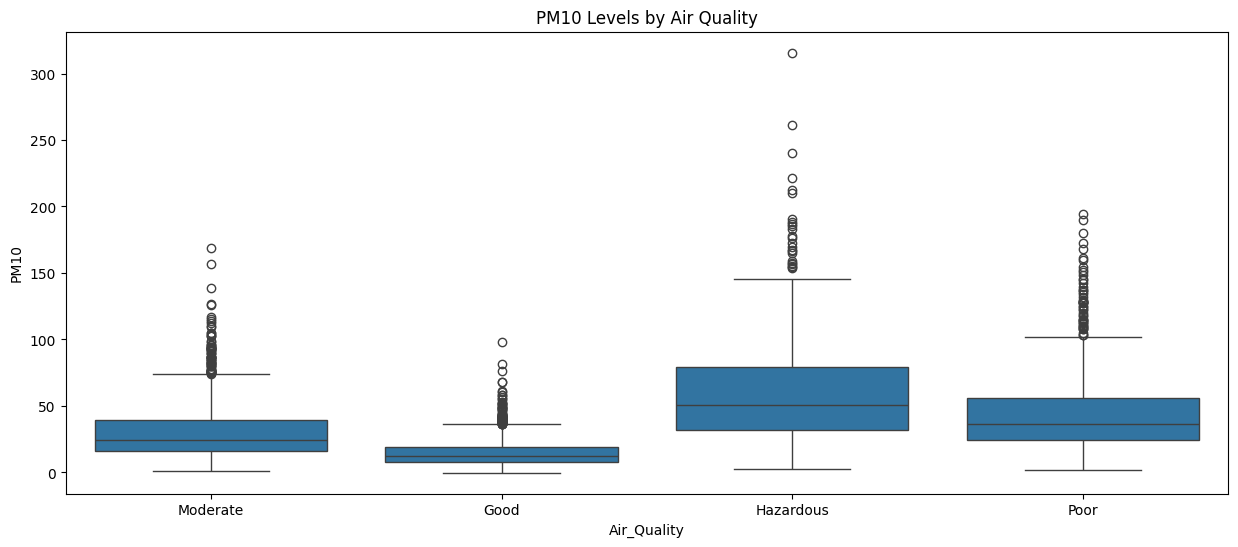

In [22]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="Air_Quality", y="PM10")
plt.title("PM10 Levels by Air Quality")
plt.show()

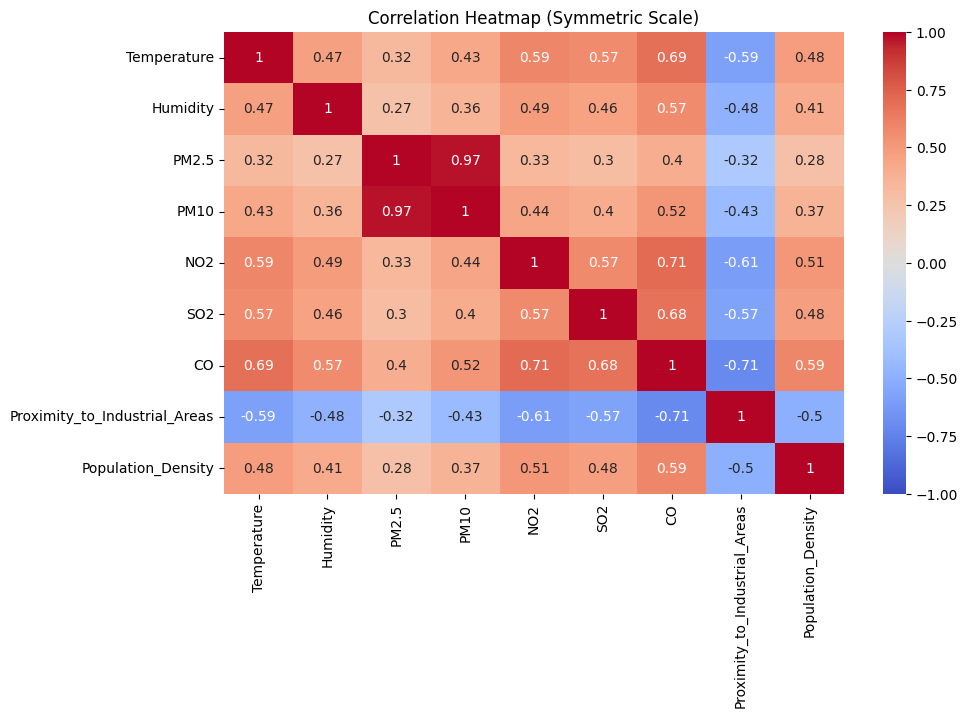

In [23]:
# Correlation Heatmap with symmetric scale
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,      # White at zero
    vmin=-1,       # Minimum correlation
    vmax=1         # Maximum correlation
)
plt.title("Correlation Heatmap (Symmetric Scale)")
plt.show()

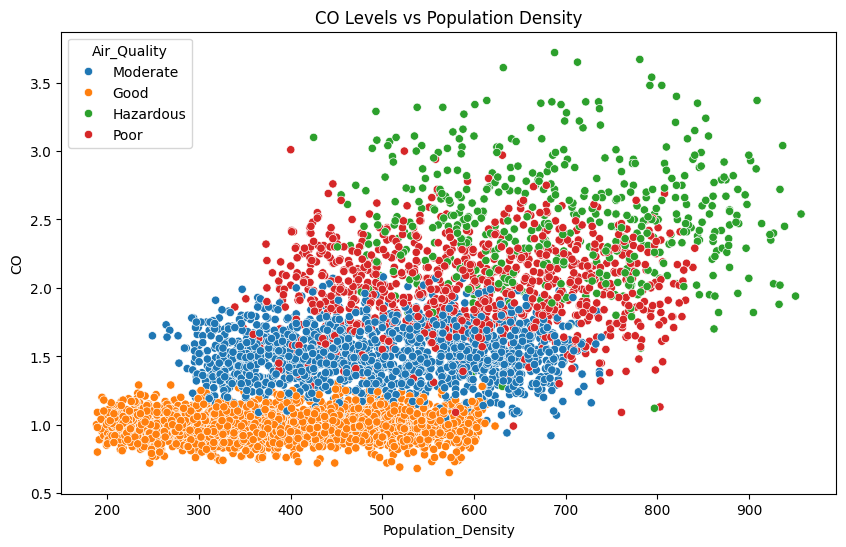

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Population_Density", y="CO", hue="Air_Quality")
plt.title("CO Levels vs Population Density")
plt.show()

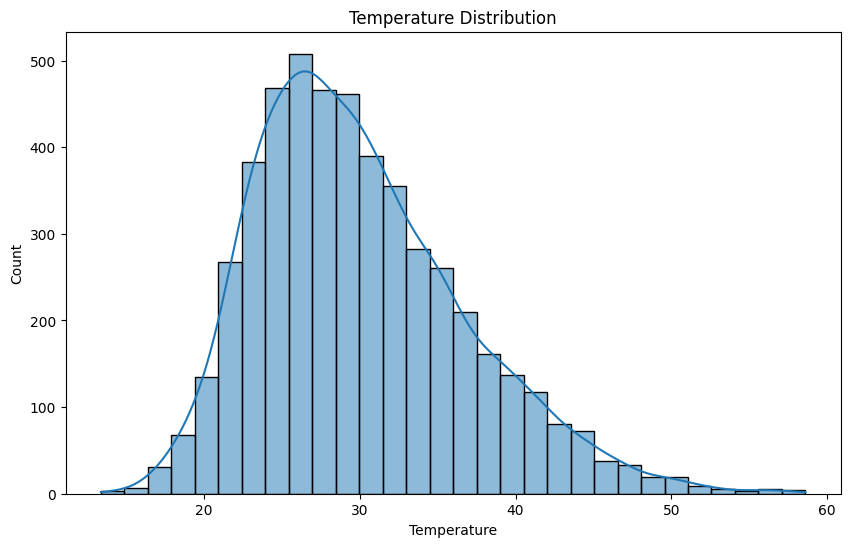

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Temperature", bins=30, kde=True)
plt.title("Temperature Distribution")
plt.show()

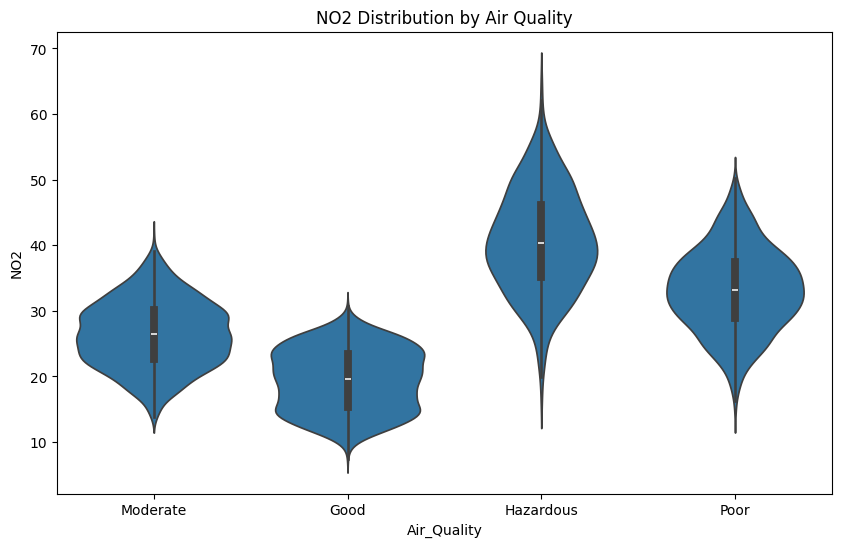

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Air_Quality", y="NO2")
plt.title("NO2 Distribution by Air Quality")
plt.show()

#### Step 4: Preprocessing

In [27]:
# Define target and feature column
X = df.drop("Air_Quality", axis=1)
y = df["Air_Quality"]

In [28]:
# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [29]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Train-Test Split
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [33]:
# Cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
# Helper scorers
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=0)
}

5-FOLD CROSS VALIDATION RESULTS (Training-Validation set)

In [39]:
# Logistic Regression CV
logreg_cv = LogisticRegression(max_iter=200)
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(logreg_cv, X_train_val, y_train_val, cv=kfold, scoring=scorer)
    print(f"Logistic Regression {metric_name}: {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression accuracy: 0.9422 ± 0.0071
Logistic Regression precision_macro: 0.9222 ± 0.0122
Logistic Regression recall_macro: 0.9131 ± 0.0135
Logistic Regression f1_macro: 0.9169 ± 0.0117


In [40]:
# Random Forest CV
rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(rf_cv, X_train_val, y_train_val, cv=kfold, scoring=scorer)
    print(f"Random Forest {metric_name}: {scores.mean():.4f} ± {scores.std():.4f}")

Random Forest accuracy: 0.9533 ± 0.0070
Random Forest precision_macro: 0.9353 ± 0.0102
Random Forest recall_macro: 0.9267 ± 0.0133
Random Forest f1_macro: 0.9302 ± 0.0113


In [41]:
# XGBoost CV
xgb_cv = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(xgb_cv, X_train_val, y_train_val, cv=kfold, scoring=scorer)
    print(f"XGBoost {metric_name}: {scores.mean():.4f} ± {scores.std():.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:03] WARNING: /w

XGBoost accuracy: 0.9520 ± 0.0074


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:05] WARNING: /w

XGBoost precision_macro: 0.9349 ± 0.0086


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:07] WARNING: /w

XGBoost recall_macro: 0.9252 ± 0.0126


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:09] WARNING: /w

XGBoost f1_macro: 0.9294 ± 0.0102


#### Step 5: Machine Learning Models

* Model 1

In [42]:
# Logistic Regression
logreg = LogisticRegression(max_iter=200)

In [43]:
# Fitting training data to model
logreg.fit(X_train_val, y_train_val)

LogisticRegression(max_iter=200)

In [44]:
# Prediction
y_pred_log = logreg.predict(X_test)

In [45]:
# Model Evaluation
print("\n Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_log, target_names=label_encoder.classes_))


 Logistic Regression Report:

              precision    recall  f1-score   support

        Good       0.99      1.00      0.99       400
   Hazardous       0.90      0.78      0.83       100
    Moderate       0.93      0.94      0.94       300
        Poor       0.83      0.86      0.84       200

    accuracy                           0.93      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.93      0.93      0.93      1000



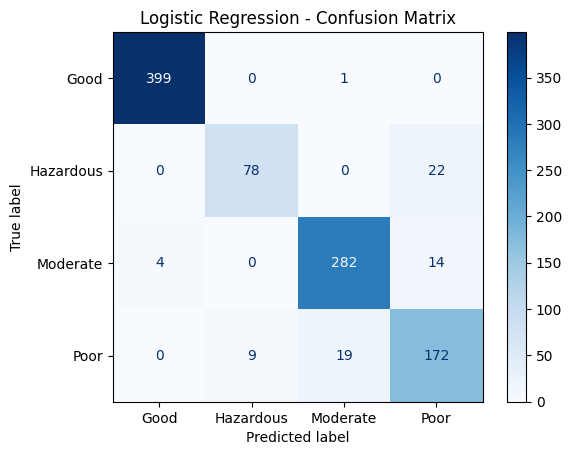

In [46]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, display_labels=label_encoder.classes_, cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

* Model 2

In [47]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [48]:
# Fitting training data to model
rf.fit(X_train_val, y_train_val)

RandomForestClassifier(random_state=42)

In [49]:
# Prediction
y_pred_rf = rf.predict(X_test)

In [50]:
# Model Evaluation
print("\n Random Forest Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


 Random Forest Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400
   Hazardous       0.90      0.80      0.85       100
    Moderate       0.96      0.97      0.97       300
        Poor       0.87      0.90      0.88       200

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



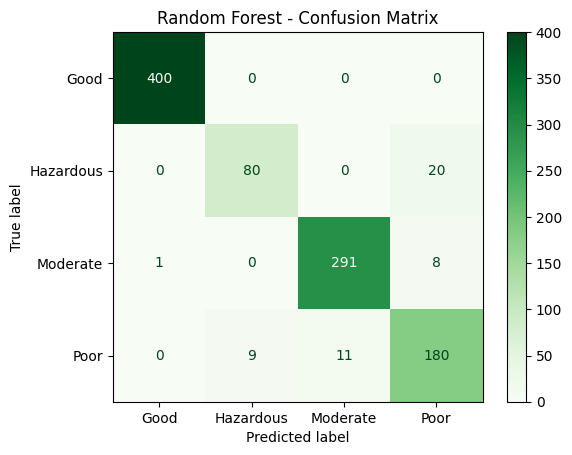

In [51]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=label_encoder.classes_, cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.show()

* Model 3

In [53]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [54]:
# Fitting training data to model
xgb.fit(X_train_val, y_train_val)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:22:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [55]:
# Prediction
y_pred_xgb = xgb.predict(X_test)

In [56]:
# Model Evaluation
print("\n XGBoost Report:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


 XGBoost Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400
   Hazardous       0.89      0.84      0.87       100
    Moderate       0.96      0.96      0.96       300
        Poor       0.87      0.90      0.88       200

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.93      1000
weighted avg       0.95      0.95      0.95      1000



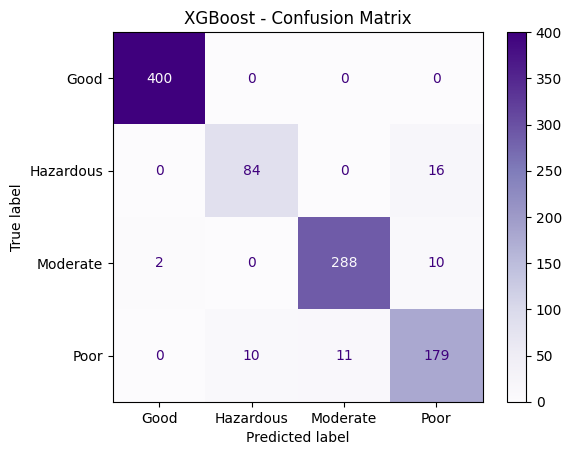

In [57]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, display_labels=label_encoder.classes_, cmap="Purples")
plt.title("XGBoost - Confusion Matrix")
plt.show()

#### Step 6: Deep Learning Model (ANN using Keras)

In [58]:
# One-hot encode target for ANN
y_train_val_cat = to_categorical(y_train_val)
y_test_cat = to_categorical(y_test)

In [59]:
# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_val.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # 4 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
# Train the model
history = model.fit(X_train_val, y_train_val_cat, validation_data=(X_test, y_test_cat), epochs=25, batch_size=32, verbose=1)

Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6941 - loss: 0.8991 - val_accuracy: 0.8710 - val_loss: 0.4029
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8745 - loss: 0.3478 - val_accuracy: 0.9040 - val_loss: 0.2782
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9086 - loss: 0.2480 - val_accuracy: 0.9200 - val_loss: 0.2286
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9231 - loss: 0.2097 - val_accuracy: 0.9210 - val_loss: 0.2042
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9311 - loss: 0.1825 - val_accuracy: 0.9230 - val_loss: 0.1847
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9419 - loss: 0.1639 - val_accuracy: 0.9350 - val_loss: 0.1759
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9400 - loss: 0.1574 - val_accuracy: 0.9340 - val_loss: 0.1680
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9438 - loss: 0.1442 - val_accuracy: 0.

In [61]:
# Evaluate the model
y_pred_ann = model.predict(X_test)
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [62]:
print("\nANN Report:\n", classification_report(y_test, y_pred_ann_classes, target_names=label_encoder.classes_))


ANN Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400
   Hazardous       0.87      0.84      0.85       100
    Moderate       0.95      0.98      0.96       300
        Poor       0.89      0.86      0.88       200

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



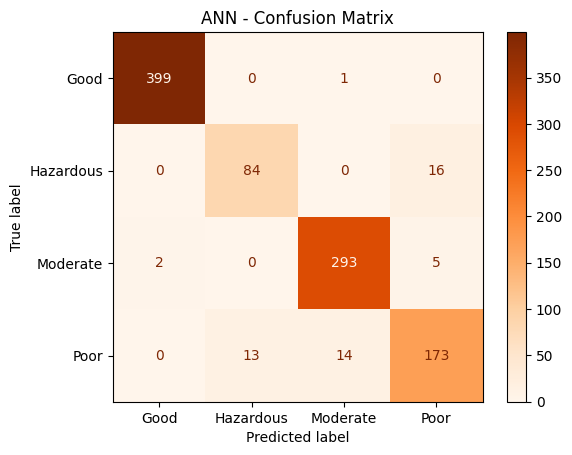

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ann_classes, display_labels=label_encoder.classes_, cmap="Oranges")
plt.title("ANN - Confusion Matrix")
plt.show()

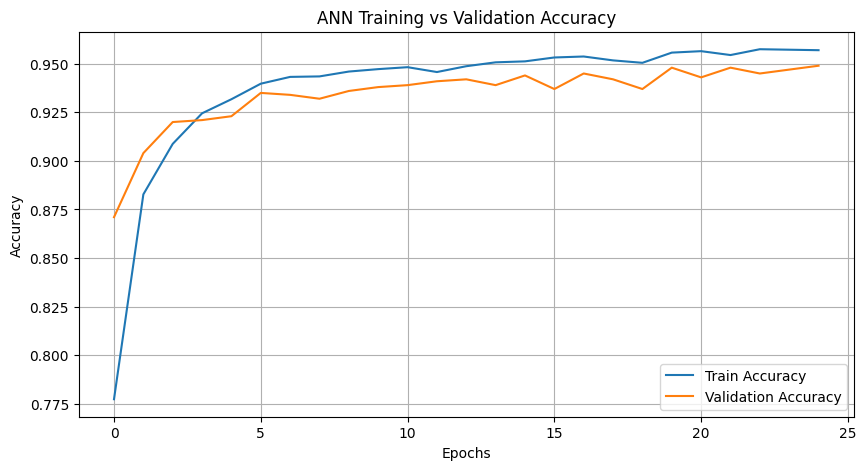

In [64]:
# Plot ANN training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Calculate accuracies
accuracy_logreg = accuracy_score(y_test, y_pred_log)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_ann = accuracy_score(y_test, y_pred_ann_classes)

# Create a DataFrame to display accuracies
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'ANN'],
    'Accuracy': [accuracy_logreg, accuracy_rf, accuracy_xgb, accuracy_ann]
})

print("\nModel Accuracies:")
accuracy_df


Model Accuracies:


Model  Accuracy
0  Logistic Regression     0.931
1        Random Forest     0.951
2              XGBoost     0.951
3                  ANN     0.949

/tmp/ipython-input-3332043444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis')


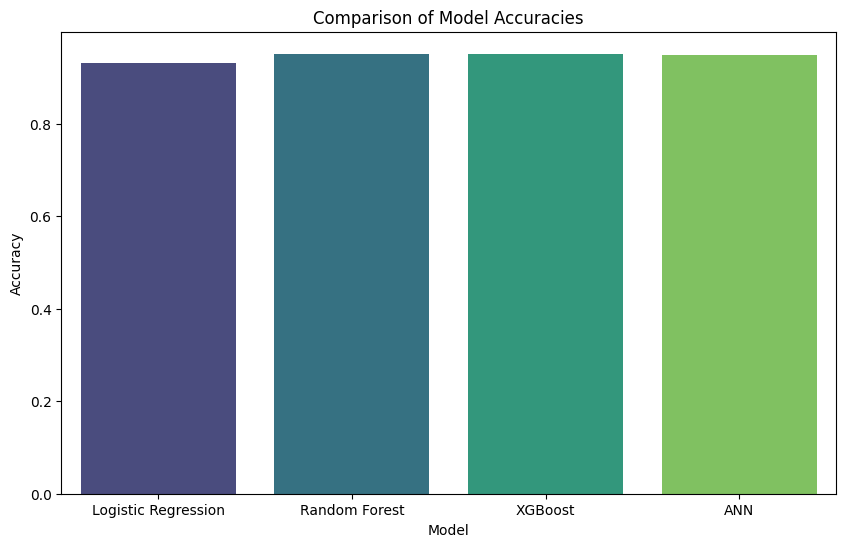

In [66]:
# Plotting accuracies
plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

In [67]:
# Take a random sample of data
random_sample_index = np.random.choice(X_test.shape[0], size=10, replace=False)
random_sample = X_test[random_sample_index]
actual_label_encoded = y_test[random_sample_index]
actual_label = label_encoder.inverse_transform(actual_label_encoded)

# Predict using one of the trained models
predicted_label_encoded = rf.predict(random_sample)
predicted_label = label_encoder.inverse_transform(predicted_label_encoded)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Actual Label': actual_label,
    'Predicted Label ': predicted_label
})

print("\nRandom Sample Prediction:")
results_df


Random Sample Prediction:


Actual Label Predicted Label 
0         Good             Good
1         Poor             Poor
2    Hazardous             Poor
3         Good             Good
4         Good             Good
5     Moderate         Moderate
6         Poor         Moderate
7         Good             Good
8         Good             Good
9         Good             Good

### SHAP Explainability

In [68]:
import shap

# Enable JS visualization
shap.initjs()

In [82]:
# SHAP for Random Forest
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test)

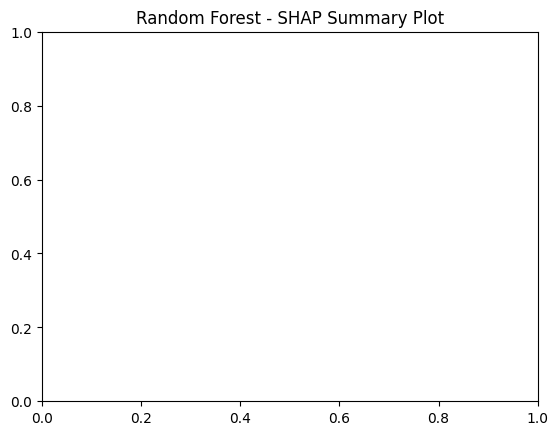

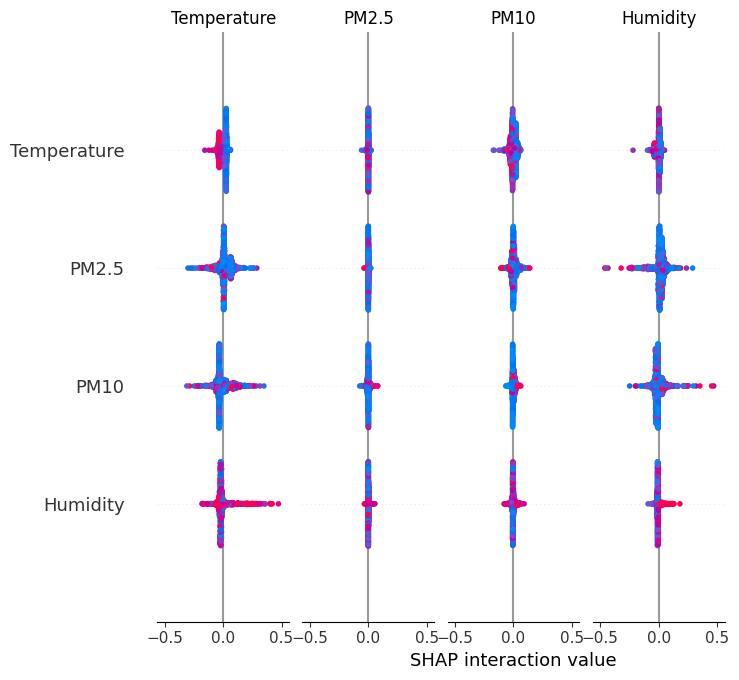

In [83]:
# Summary plot for Random Forest (global feature importance)
plt.title("Random Forest - SHAP Summary Plot")
shap.summary_plot(shap_values_rf, X_test, feature_names=df.drop("Air_Quality", axis=1).columns)

In [84]:
# SHAP for XGBoost
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)

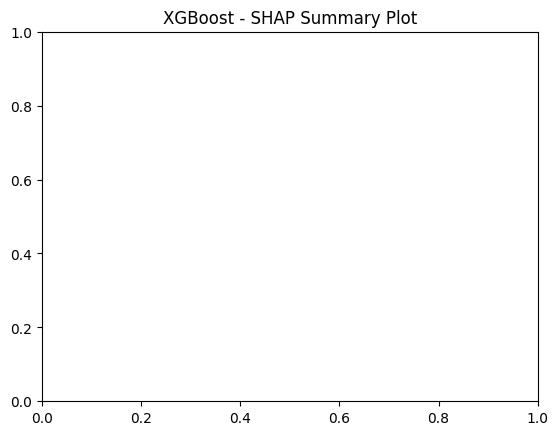

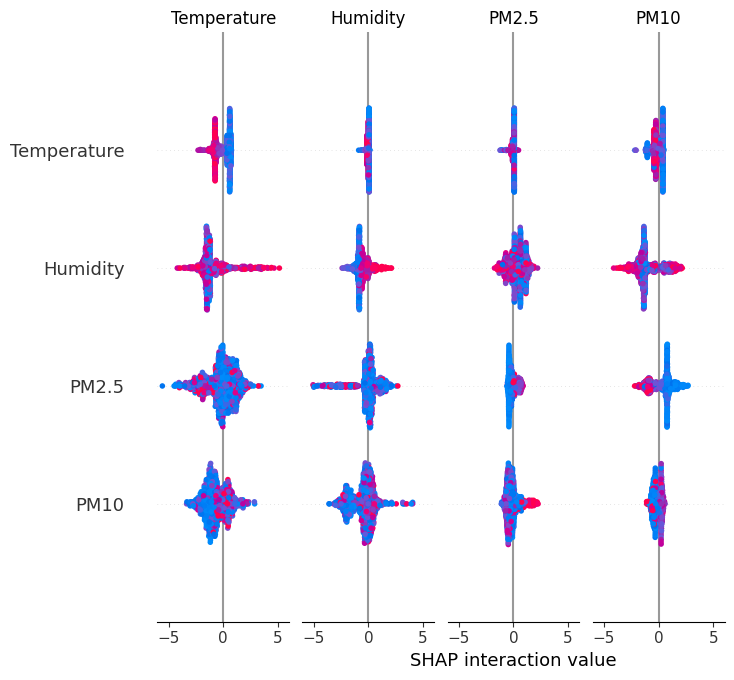

In [85]:
# Summary plot for XGBoost (global feature importance)
plt.title("XGBoost - SHAP Summary Plot")
shap.summary_plot(shap_values_xgb, X_test, feature_names=df.drop("Air_Quality", axis=1).columns)